<div style="text-align:left;font-size:2em"><span style="font-weight:bolder;font-size:1.25em">SP2273 | Learning Portfolio</span><br><br><span style="font-weight:bold;color:darkred">Plotting (Good)</span></div>

In [1]:
from matplotlib import pyplot as plt
import numpy as np

# What to expect in this chapter

# Some nomenclature

# Comparing the two ‘dialects’

In [2]:
x = np.linspace(-np.pi, np.pi, num=100)
cos_x = np.cos(x)
sin_x = np.sin(x)

### pyplot Interface

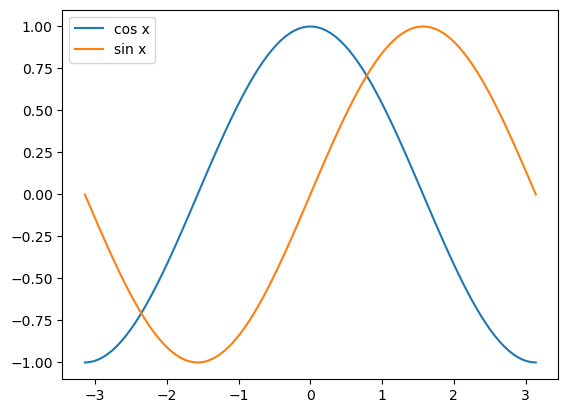

In [3]:
plt.plot(x, cos_x, label='cos x')
plt.plot(x, sin_x, label='sin x')
plt.legend()

### OO Interface

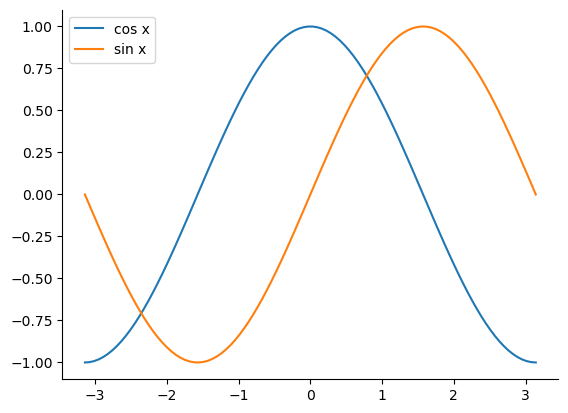

In [10]:
fig, ax = plt.subplots(nrows=1, ncols=1)
ax.plot(x, cos_x, label='cos x')
ax.plot(x, sin_x, label='sin x')
ax.legend()
ax.spines[['right','top']].set_visible(False)

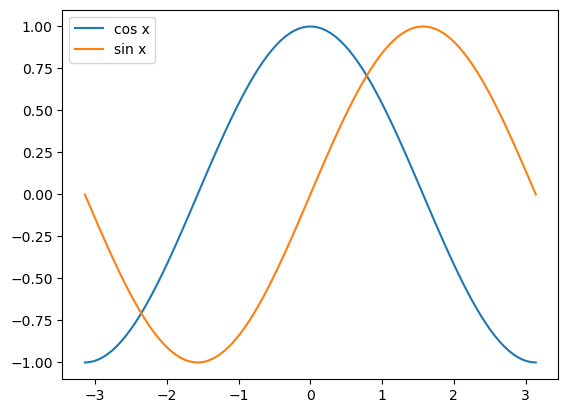

In [5]:
fig

In [6]:
type(fig)

matplotlib.figure.Figure

In [7]:
type(ax)

matplotlib.axes._axes.Axes

# What is OO ax, really?

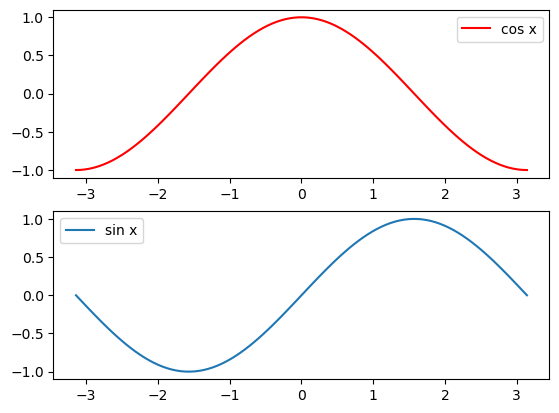

In [12]:
fig, ax = plt.subplots(nrows=2, ncols=1)

ax[0].plot(x, cos_x, label='cos x', c='r')
ax[1].plot(x, sin_x, label='sin x')

ax[0].legend()
ax[1].legend()

In [14]:
type(ax)

numpy.ndarray

In [15]:
ax.shape

(2,)

In [16]:
type(ax[0])

matplotlib.axes._axes.Axes

In [19]:
ax[1]

array([<Axes: title={'center': 'Bottom Left'}>,
       <Axes: title={'center': 'Bottom Right'}>], dtype=object)

# A complete OO example

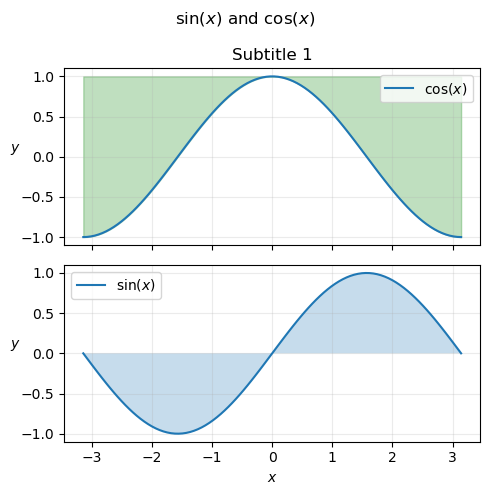

In [30]:
fig, ax = plt.subplots(nrows=2, ncols=1,
                       figsize=(5, 5),
                       sharex=True)
ax[0].plot(x, cos_x, label=r'$\cos(x)$')
ax[0].fill_between(x, 1, cos_x, alpha=.25, color='green')
ax[1].plot(x, sin_x, label=r'$\sin(x)$')
ax[1].fill_between(x, 0, sin_x, alpha=.25)

for a in ax.flatten():
    a.legend()
    a.grid(alpha=.25)
    a.set_ylabel('$y$', rotation=0)

ax[1].set_xlabel('$x$')

ax[0].set_title('Subtitle 1')

fig.suptitle(r'$\sin(x)$ and $\cos(x)$')
fig.tight_layout()

plt.savefig('sinx_cosx.png', dpi=150)

In [33]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

# Multiple rows and columns

In [32]:
ax

array([[<Axes: >, <Axes: >],
       [<Axes: >, <Axes: >]], dtype=object)

In [38]:
ax.flatten()

array([<Axes: >, <Axes: >, <Axes: >, <Axes: >], dtype=object)

In [34]:
ax.shape

(2, 2)

## Using ax

## Sharing axes

## Accessing all axes

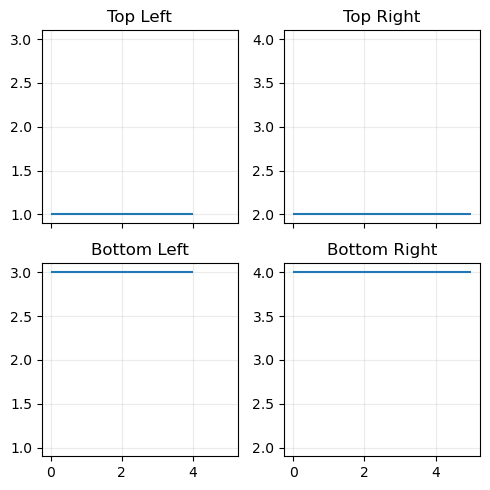

In [46]:
fig, ax = plt.subplots(nrows=2, ncols=2,
                       figsize=(5, 5),
                       sharex=True, sharey='col'
                      )

# Some variables to access the axes and improve readabilty
top_left, top_right, bottom_left, bottom_right = ax.flatten()

top_left.set_title('Top Left')
top_right.set_title('Top Right')
bottom_left.set_title('Bottom Left')
bottom_right.set_title('Bottom Right')

top_left.hlines(y=1, xmin=0, xmax=4)
top_right.hlines(y=2, xmin=0, xmax=5)
bottom_left.hlines(y=3, xmin=0, xmax=4)
bottom_right.hlines(y=4, xmin=0, xmax=5)

for a in ax.flatten():
    a.grid(alpha=.25)
    #a.spines['right'].set_visible(False)

plt.tight_layout()

# Other useful plots

## Histograms

### Data

In [49]:
data=dict()
filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
data['All'] = np.loadtxt(filename, skiprows=1)

filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
data['NUS'] = np.loadtxt(filename, skiprows=1)

data

{'All': array([3701., 2850., 3053., ..., 3856., 3303., 3245.]),
 'NUS': array([2741., 3057., 3098., 2960., 3404., 2740., 3065., 3350., 3933.,
        3277., 3266., 4106., 3007., 2961., 2839., 2823., 3245., 3140.,
        3592., 3286., 2940., 3153., 3330., 3036., 3155., 4922., 4406.,
        2687., 2896., 2850., 2726., 3101., 3473., 2719., 3141., 3192.,
        3234., 3979., 2836., 3350., 3107., 3729., 3183., 3684., 4054.,
        4290., 2600., 3089., 2931., 2966., 3277., 3212., 3674., 3306.,
        3375., 3250., 3591., 3054., 3160., 5027., 4404., 2976., 3123.,
        2760., 2804., 3224., 3467., 2839., 3266., 3317., 3164., 4173.,
        2817., 3547., 3230., 3847., 3255., 3597., 4053., 4054., 2907.,
        2989., 3146., 3256., 3400., 3300., 4119., 3452., 3768., 3318.,
        3624., 3121., 3279., 4866., 4352., 3175., 3219., 3244., 3203.,
        2859., 3245., 3431., 3400., 2971., 3258., 3341., 4173., 3314.,
        3414., 3402., 3884., 3669., 3549., 3432., 3788., 3381., 3470.,
      

### A quick helper function

In [47]:
def get_plot_data():
    data = {}
    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_all.csv'
    data['All'] = np.loadtxt(filename, skiprows=1)

    filename = 'sg-gov-graduate-employment-survey_basic_monthly_mean_nus.csv'
    data['NUS'] = np.loadtxt(filename, skiprows=1)

    return data

### The histogram

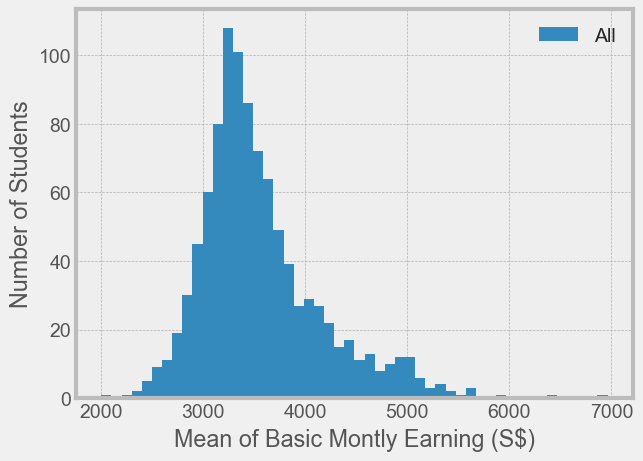

In [54]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All']], bins=50, label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

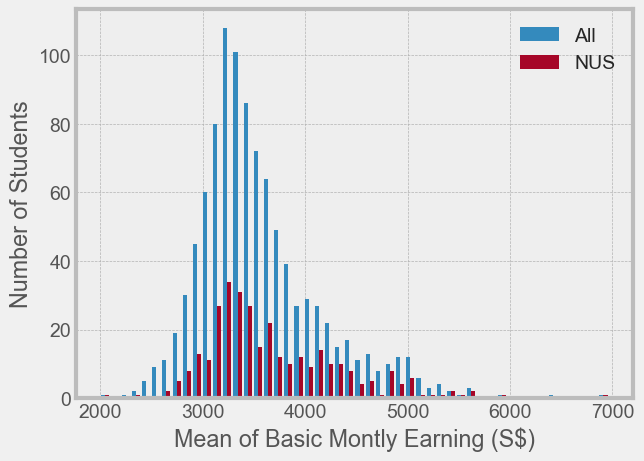

In [56]:
plt.style.use('bmh')
data = get_plot_data()

# bins specifies how many bins to split the data
plt.hist([data['All'], data['NUS']], 
         bins=50, 
         label=['All', 'NUS'])
plt.xlabel('Mean of Basic Montly Earning (S$)')
plt.ylabel('Number of Students')
plt.legend()

## Scatter plots

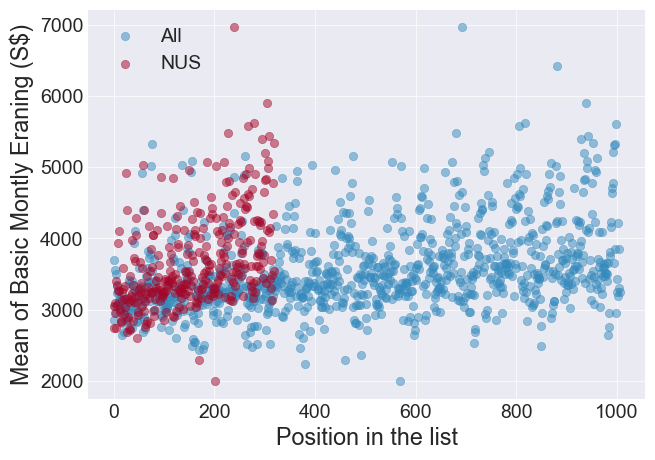

In [57]:
plt.style.use("seaborn-v0_8-darkgrid")

data = get_plot_data()

for plotlabel, numbers in data.items():
    x = range(len(numbers))
    y = numbers
    plt.scatter(x, y, label=plotlabel, alpha=.5)

plt.xlabel('Position in the list')
plt.ylabel('Mean of Basic Montly Eraning (S$)')
plt.legend()

## Bar charts

Text(0, 0.5, 'Number of Students')

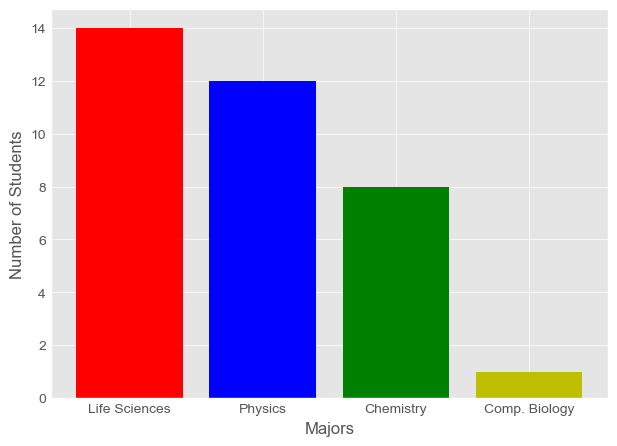

In [60]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('ggplot')
plt.bar(majors, numbers,
       color=['r','b','g','y'])
plt.xlabel('Majors')
plt.ylabel('Number of Students')

## Pie charts

Text(0.5, 1.0, 'Percentage of each major')

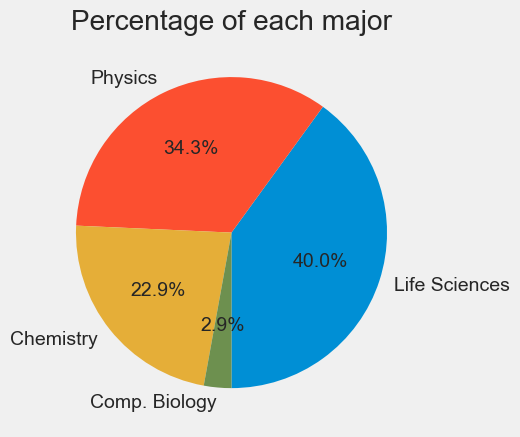

In [53]:
student_numbers = {'Life Sciences': 14,
                   'Physics': 12,
                   'Chemistry': 8,
                   'Comp. Biology': 1}
majors = list(student_numbers.keys())
numbers = list(student_numbers.values())

plt.style.use('fivethirtyeight')
plt.pie(numbers, 
        labels=majors,
        autopct='%1.1f%%',   # How to format the percentages
        startangle=-90                
        )
plt.title('Percentage of each major')